In [20]:
import pandas as pd
import numpy as np
import math
import time

from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('melbourne_property_data/MELBOURNE_HOUSE_PRICES_LESS.csv')

In [4]:
PRICE = 'Price'
DISTANCE_2_CBD = 'Distance' # Distance to Melbourne CBD
REGION = 'Regionname'       # General Region
N_ROOMS = 'Rooms'           
TYPE = 'Type'               # Housing type
SUBURB = 'Suburb'
SELLER = 'SellerG'          # Seller Agent Company
N_PRPOERTY = 'Propertycount'
DATE = 'Date'               # Date Sold
METHOD = 'Method'

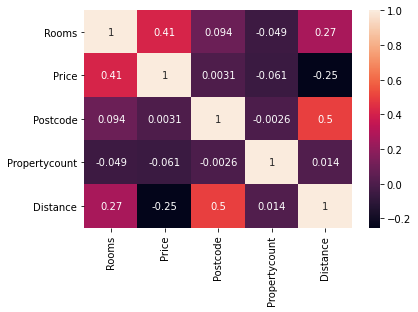

In [5]:
sns.heatmap(df.corr(), annot = True)
plt.show()

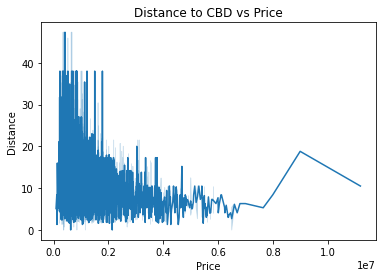

In [6]:
sns.lineplot(x=df[PRICE], y=df[DISTANCE_2_CBD])
plt.title("Distance to CBD vs Price")
plt.show()

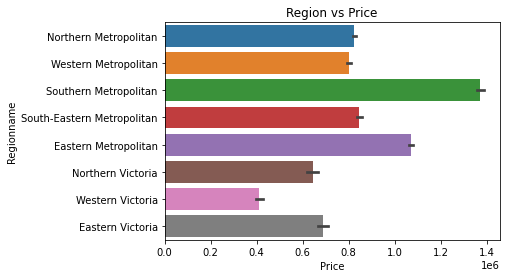

In [7]:
sns.barplot(x=df[PRICE], y=df[REGION])
plt.title("Region vs Price")
plt.show()

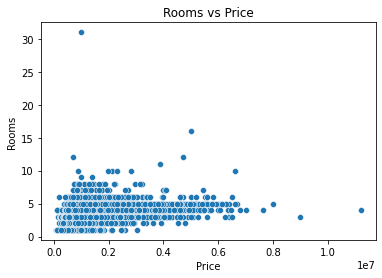

In [8]:
sns.scatterplot(x=df[PRICE], y=df[N_ROOMS])
plt.title("Rooms vs Price")
plt.show()

In [9]:
# Remove all NaN in Price
df = df.dropna(subset = [PRICE])

In [10]:
# There might be an error in 55467
df = df.drop(55467)

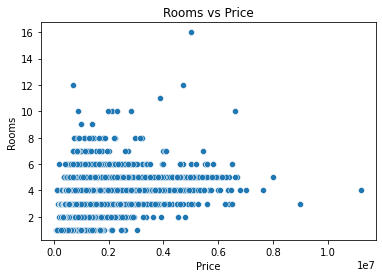

In [11]:
sns.scatterplot(x=df[PRICE], y=df[N_ROOMS])
plt.title("Rooms vs Price")
plt.show()

In [12]:
# Find average price per room
df['price/room'] = df[PRICE] / df[N_ROOMS]
df['price/room'].describe()

count    4.843200e+04
mean     3.326808e+05
std      1.682283e+05
min      3.166667e+04
25%      2.190000e+05
50%      2.964375e+05
75%      4.026667e+05
max      3.050000e+06
Name: price/room, dtype: float64

In [13]:
price_per_room = df[PRICE].sum() / df[N_ROOMS].sum()
price_per_room

324933.04062821454

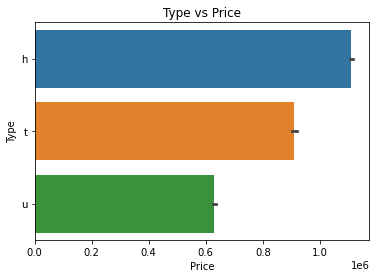

In [14]:
sns.barplot(x=df[PRICE], y=df[TYPE])
plt.title("Type vs Price")
plt.show()

In [19]:
df[[PRICE, 'price/room']].describe()

,Price,price/room
count,4.843200e+04,4.843200e+04
mean,9.978984e+05,3.326808e+05
std,5.935050e+05,1.682283e+05
min,8.500000e+04,3.166667e+04
25%,6.200000e+05,2.190000e+05
50%,8.300000e+05,2.964375e+05
75%,1.220000e+06,4.026667e+05
max,1.120000e+07,3.050000e+06


# Preprocessing

In [31]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,price/room
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council,496666.666667
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council,406666.666667
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council,473333.333333
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council,505000.000000
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,335000.000000


In [34]:
# Use one-hot encoding
enc_df = pd.get_dummies(df, columns = [SUBURB, TYPE, METHOD, SELLER, REGION, 'CouncilArea'])

In [58]:
enc_df['year'] = pd.DatetimeIndex(df['Date']).year

In [71]:
enc_df.iloc[:,:8]

,Address,Rooms,Price,Date,Postcode,Propertycount,Distance,price/room
0,49 Lithgow St,3,1490000.0,2017-01-04,3067,4019,3.0,496666.666667
1,59A Turner St,3,1220000.0,2017-01-04,3067,4019,3.0,406666.666667
2,119B Yarra St,3,1420000.0,2017-01-04,3067,4019,3.0,473333.333333
3,68 Vida St,3,1515000.0,2017-01-04,3040,1543,7.5,505000.000000
4,92 Clydesdale Rd,2,670000.0,2017-01-04,3042,3464,10.4,335000.000000
...,...,...,...,...,...,...,...,...
63016,4/34 Petrie St,2,347700.0,2018-03-31,3199,17055,38.0,173850.000000
63017,229 Murray Rd,3,808000.0,2018-03-31,3072,14577,8.4,269333.333333
63018,3 Carr Pl,3,566000.0,2018-03-31,3064,5833,20.6,188666.666667
63019,9 Parker Ct,3,500000.0,2018-03-31,3064,5833,20.6,166666.666667


# Feature Selection

In [59]:
y = enc_df[PRICE]
x = enc_df.drop([PRICE, 'Address', 'price/room', 'Date'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

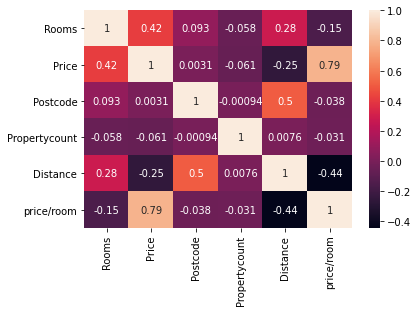

In [72]:
sns.heatmap(enc_df.iloc[:,:8].corr(), annot = True)
plt.show()
# rooms and distance have high correlation, can ignore 0.79 since it is derived from price

In [60]:
x.dtypes

Rooms                                       int64
Postcode                                    int64
Propertycount                               int64
Distance                                  float64
Suburb_Abbotsford                           uint8
                                           ...   
CouncilArea_Whittlesea City Council         uint8
CouncilArea_Wyndham City Council            uint8
CouncilArea_Yarra City Council              uint8
CouncilArea_Yarra Ranges Shire Council      uint8
year                                        int64
Length: 847, dtype: object

In [61]:
x.columns

Index(['Rooms', 'Postcode', 'Propertycount', 'Distance', 'Suburb_Abbotsford',
       'Suburb_Aberfeldie', 'Suburb_Airport West', 'Suburb_Albanvale',
       'Suburb_Albert Park', 'Suburb_Albion',
       ...
       'CouncilArea_Murrindindi Shire Council',
       'CouncilArea_Nillumbik Shire Council',
       'CouncilArea_Port Phillip City Council',
       'CouncilArea_Stonnington City Council',
       'CouncilArea_Whitehorse City Council',
       'CouncilArea_Whittlesea City Council',
       'CouncilArea_Wyndham City Council', 'CouncilArea_Yarra City Council',
       'CouncilArea_Yarra Ranges Shire Council', 'year'],
      dtype='object', length=847)

In [62]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
fit = pca.fit(x)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [9.99204291e-01 7.93269523e-04 2.14454100e-06]
[[-1.21466921e-05 -2.64090985e-05  9.99999998e-01 ...  2.33011962e-06
  -3.36053882e-07  2.68491220e-06]
 [ 6.94204080e-04  9.99535636e-01  2.60164051e-05 ... -4.82722315e-05
   3.27122344e-05  1.25399445e-04]
 [ 3.98385766e-02 -3.03693678e-02 -1.25961176e-05 ... -5.98018039e-03
   1.00354989e-03  3.26687812e-03]]
